**Exploratory Data Ananysis and Data Wrangling**

In [44]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = df.rename(columns={'y':'subscribed'})

In [5]:
sub_df = df[df['subscribed']=='yes']

In [6]:
sub_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.nunique()

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64

In [9]:
df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

In [100]:
df.shape

(45211, 17)

In [101]:
df = df.drop_duplicates()

In [102]:
df.shape

(45211, 17)

<AxesSubplot:xlabel='subscribed', ylabel='balance'>

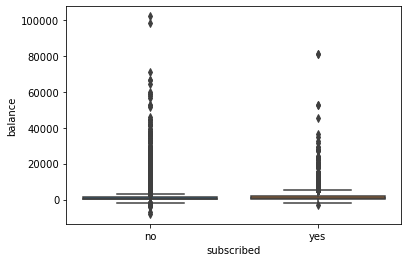

In [104]:
sns.boxplot(x = 'subscribed', y='balance', data=df)

<AxesSubplot:xlabel='subscribed', ylabel='duration'>

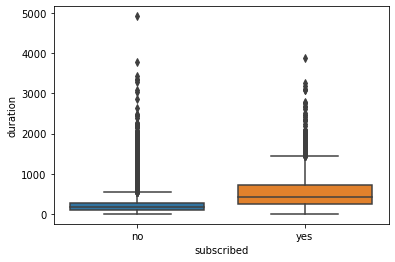

In [105]:
sns.boxplot(x = 'subscribed', y='duration', data=df)

In [17]:
age_df = df.groupby('subscribed', as_index=False)['age'].mean()

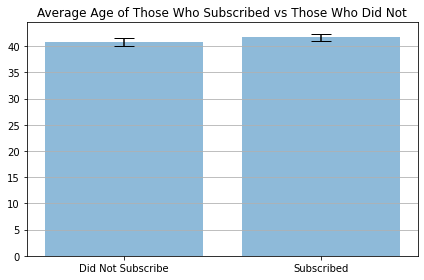

In [18]:
error=0.75
fig, ax = plt.subplots()
ax.bar(age_df['subscribed'], age_df['age'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(age_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Age of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

In [19]:
subscribed_df = df[df['subscribed']=='yes']
did_not_subscribe_df = df[df['subscribed']=='no']

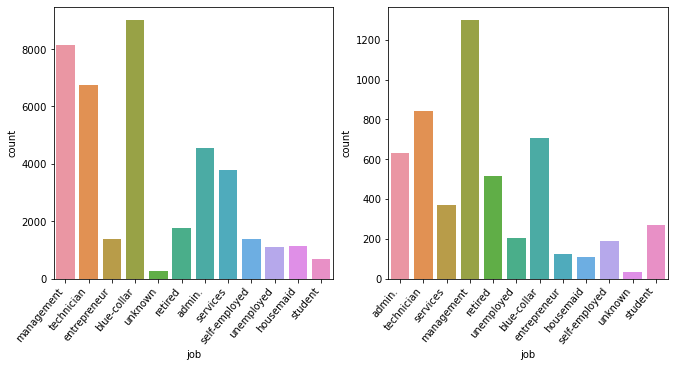

In [57]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['job'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['job'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

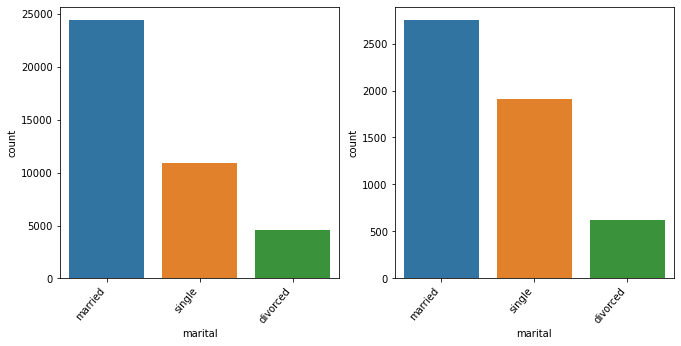

In [58]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['marital'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['marital'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

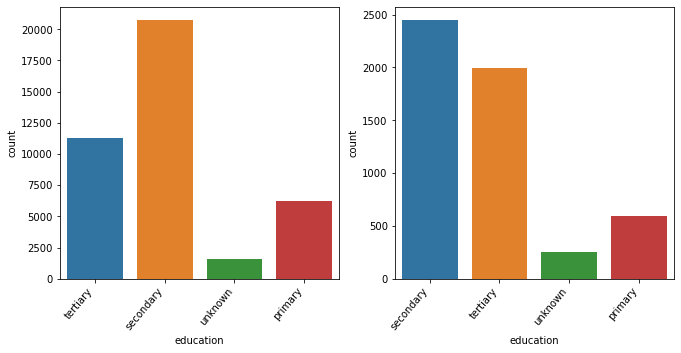

In [61]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['education'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['education'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

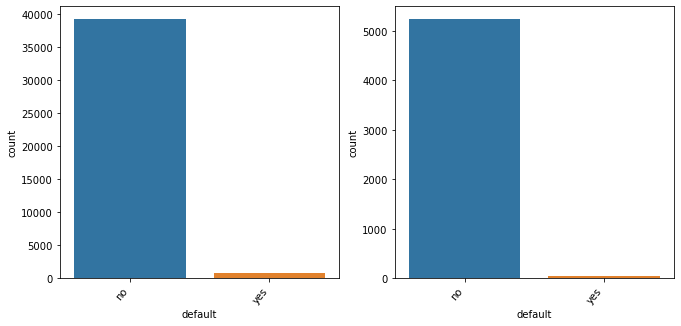

In [62]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['default'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['default'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

In [63]:
balance_df = df.groupby('subscribed', as_index=False)['balance'].mean()

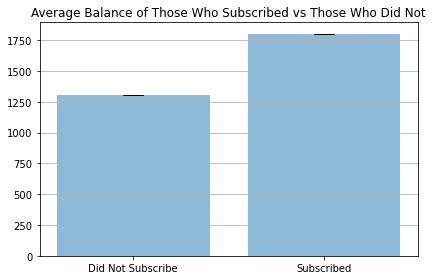

In [64]:
error=0.75
fig, ax = plt.subplots()
ax.bar(balance_df['subscribed'], balance_df['balance'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(balance_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Balance of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

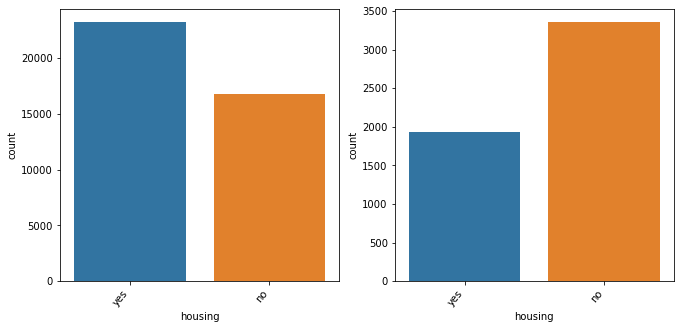

In [65]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['housing'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['housing'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

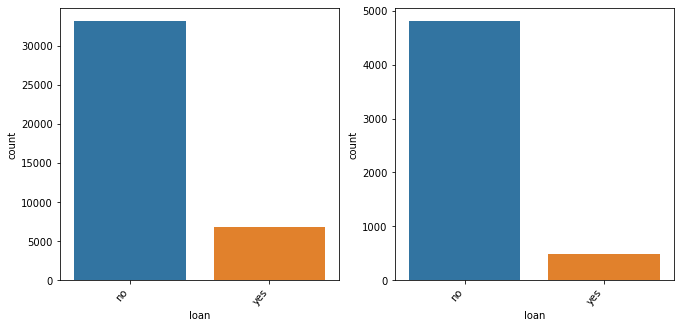

In [66]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['loan'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['loan'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

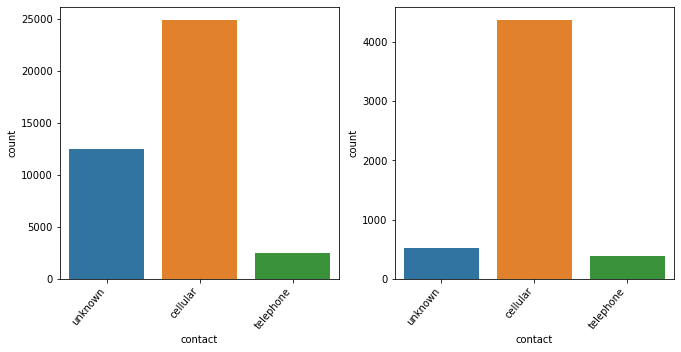

In [67]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['contact'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['contact'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

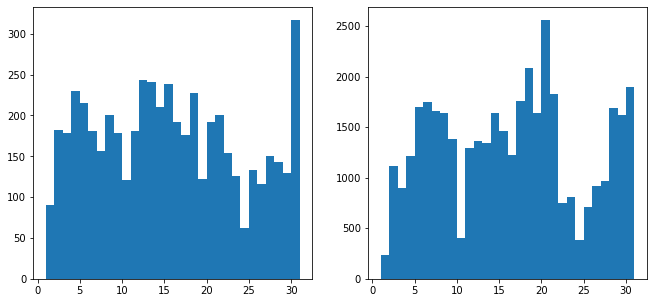

In [89]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))
ax1 = subscribed_df['day'].hist(bins=30, grid=False, ax=ax[0])
ax2 = did_not_subscribe_df['day'].hist(bins=30, grid=False, ax=ax[1])

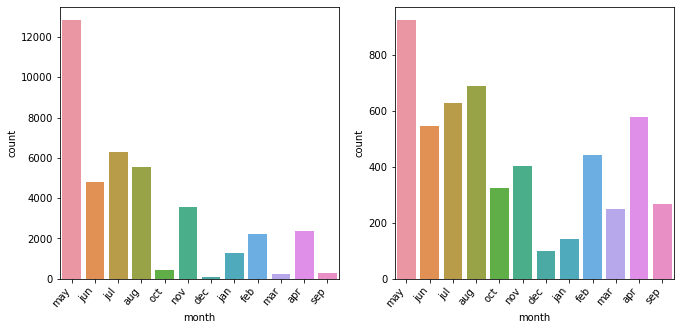

In [90]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['month'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['month'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

In [93]:
duration_df = df.groupby('subscribed', as_index=False)['duration'].mean()

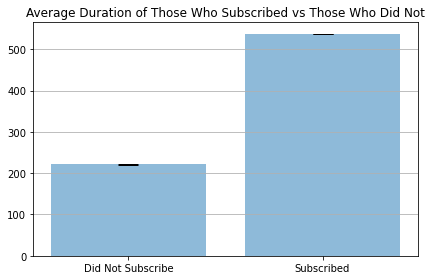

In [94]:
error=0.75
fig, ax = plt.subplots()
ax.bar(duration_df['subscribed'], duration_df['duration'],
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)

labels = ['Did Not Subscribe', 'Subscribed']
ax.set_xticks(balance_df['subscribed'])
ax.set_xticklabels(labels)
ax.set_title('Average Duration of Those Who Subscribed vs Those Who Did Not')
ax.yaxis.grid(True)

plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

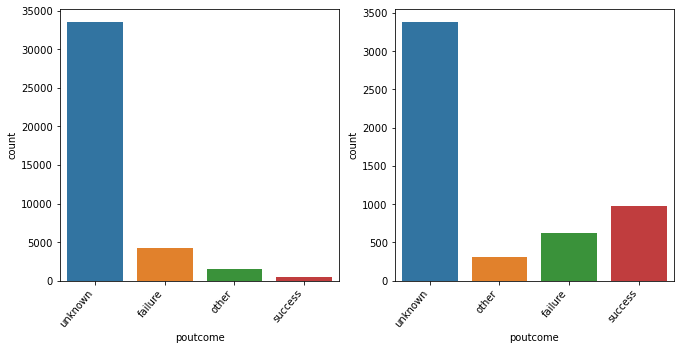

In [96]:
fig, ax =plt.subplots(1,2, figsize=(11, 5))

plt1 = sns.countplot(did_not_subscribe_df['poutcome'], ax=ax[0])
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt2 = sns.countplot(subscribed_df['poutcome'], ax=ax[1])
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=50, horizontalalignment = 'right')

plt.show()

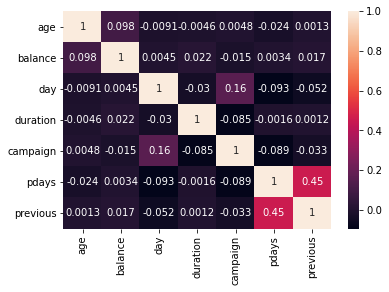

In [97]:
correlation_mat = df.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()